In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# Author: xiebo

# Python implementation: CPython
# Python version       : 3.8.5
# IPython version      : 8.12.3

# torch      : 2.2.0+cu118
# torchdata  : 0.7.1
# torchtext  : 0.17.0
# torchvision: 0.17.0+cu118
# torchaudio : 2.2.0+cu118
# openai     : 1.10.0
# langchain  : 0.1.5
# tiktoken   : 0.5.2
# numpy      : 1.24.4
# pandas     : 2.0.3
# sklearn    : 1.3.2
# matplotlib : 3.7.4
# scipy      : 1.10.1

%load_ext watermark
%watermark -a 'xiebo' -d -t -v -p torch,torchdata,torchtext,torchvision,torchaudio,openai,langchain,tiktoken,numpy,pandas,sklearn,matplotlib,scipy

Author: xiebo

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 8.12.3

torch      : 2.2.0+cu118
torchdata  : 0.7.1
torchtext  : 0.17.0
torchvision: 0.17.0+cu118
torchaudio : 2.2.0+cu118
openai     : 1.10.0
langchain  : 0.1.5
tiktoken   : 0.5.2
numpy      : 1.24.4
pandas     : 2.0.3
sklearn    : 1.3.2
matplotlib : 3.7.4
scipy      : 1.10.1



In [3]:
import sys
sys.path.append("..")
sys.path.append("../..")

from project_utils import *

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
fix_all_seed()

In [6]:
print_closeai()

OPENAI_BASE_URL: https://api.closeai-proxy.xyz/v1
OPENAI_API_KEY: 8V55bZBNNrS0keILgUUIQwW1RWO-Ys4siyk9zwk2i27DwqoCzaQ


## 单纯的一次对话

In [7]:
# prompt_token_count = 9, completion_token_count = 18, total_token_count = 27.
# choice_count = 1, cost time = 1.2s, finish_reason = stop.
# 你好！有什么我可以帮助你的吗？
content = get_chat_completion_content("你好")
print(content)

你好！有什么我可以帮助你的吗？


## 增加 system 指令，gpt 对开头的关键词更敏感

In [8]:
# prompt_token_count = 67, completion_token_count = 379, total_token_count = 446.
# choice_count = 1, cost time = 6.3s, finish_reason = stop.
# 作为私人秘书，我可以帮您处理日常事务，包括但不限于以下任务：

# 1. 管理日程安排：安排会议、预订行程、提醒重要事件等。
# 2. 筛选和回复邮件：帮您处理电子邮件，筛选重要邮件并回复。
# 3. 组织文件和资料：整理和管理文件、文档和资料，确保您能够轻松找到所需信息。
# 4. 安排会议和活动：协助您安排会议、活动和社交聚会，包括预订场地、发送邀请函等。
# 5. 电话和邮件代接：代接您的电话和邮件，过滤垃圾信息并转达重要信息。
# 6. 旅行安排：为您预订机票、酒店和交通工具，确保您的出行顺利。
# 7. 财务管理：协助您管理个人财务，包括账单支付、预算制定等。
# 8. 管理社交媒体：帮您管理社交媒体账号，发布内容、回复评论等。

# 我全天候无休假，根据您的需求，我可以根据您的时间安排灵活上班。无论是早晨、下午还是晚上，我都会为您提供服务。
content = get_chat_completion_content(
                            user_prompt="你可以干啥？你什么时间上班",
                            system_prompt="你是一个私人秘书，你可以帮我干很多杂事，你为我工作的时间是全天候无休假。",
                            temperature=0.2)
print(content)

作为私人秘书，我可以帮您处理日常事务，包括但不限于：

1. 日程安排和管理：为您安排会议、约会和旅行安排。
2. 电子邮件和电话管理：筛选和回复您的电子邮件和电话。
3. 文件和文档管理：整理和归档重要文件和文档。
4. 会议和活动组织：帮助您组织会议、活动和庆祝活动。
5. 旅行和住宿安排：为您预订机票、酒店和租车服务。
6. 购物和礼品采购：帮助您购买礼物和日常用品。
7. 翻译和撰写文件：提供翻译和撰写文件的服务。
8. 紧急情况处理：在紧急情况下为您提供支持和解决问题。

我全天候无休假，可以根据您的需求灵活安排工作时间。无论是白天还是晚上，周末还是工作日，我都会为您提供服务。


## 即使是一轮对话，也可以同时说多句，但 gpt 只回一句

In [9]:
# prompt_token_count = 29, completion_token_count = 57, total_token_count = 86.
# choice_count = 1, cost time = 1.4s, finish_reason = stop.
# 作为一个人工智能助手，我没有性别和年龄。我只是一个程序，专注于提供帮助和回答问题。有什么我可以帮助你的吗？
content = get_chat_completion_content(
                            user_prompt=["你是男生还是女生?", "你的年纪是多大？"],
                            temperature=0.8)
print(content)

我是一个AI助手，没有性别和年龄。我只是一个程序，被设计来回答问题和提供帮助。有什么我可以帮助你的吗？


## 请求生成图片接口，这是一个 url 的例子，1 小时失效，同时要下载的话要额外花时间，从 cost time = 22s 可以看出，效率不高。

In [10]:
# cost time = 22.1s.
# Depict a heartwarming scene of a cat and a dog displaying close friendship.
revised_prompt, url_or_local_image_path_or_data = get_image_create("展示一只猫和一只狗亲密友好的画面。", response_format="url")
print(revised_prompt)

cost time = 30.4s.
Create a visually pleasing image that showcases a cat and a dog in a friendly and affectionate interaction. The scene ought to be warm and peaceful, filled with elements of playfulness and mutual respect typical of the bonds formed between different species. Perhaps the cat and dog could be seen napping together, playfully wrestling, or sharing a meal, anything that genuinely communicates their close-knit relationship.


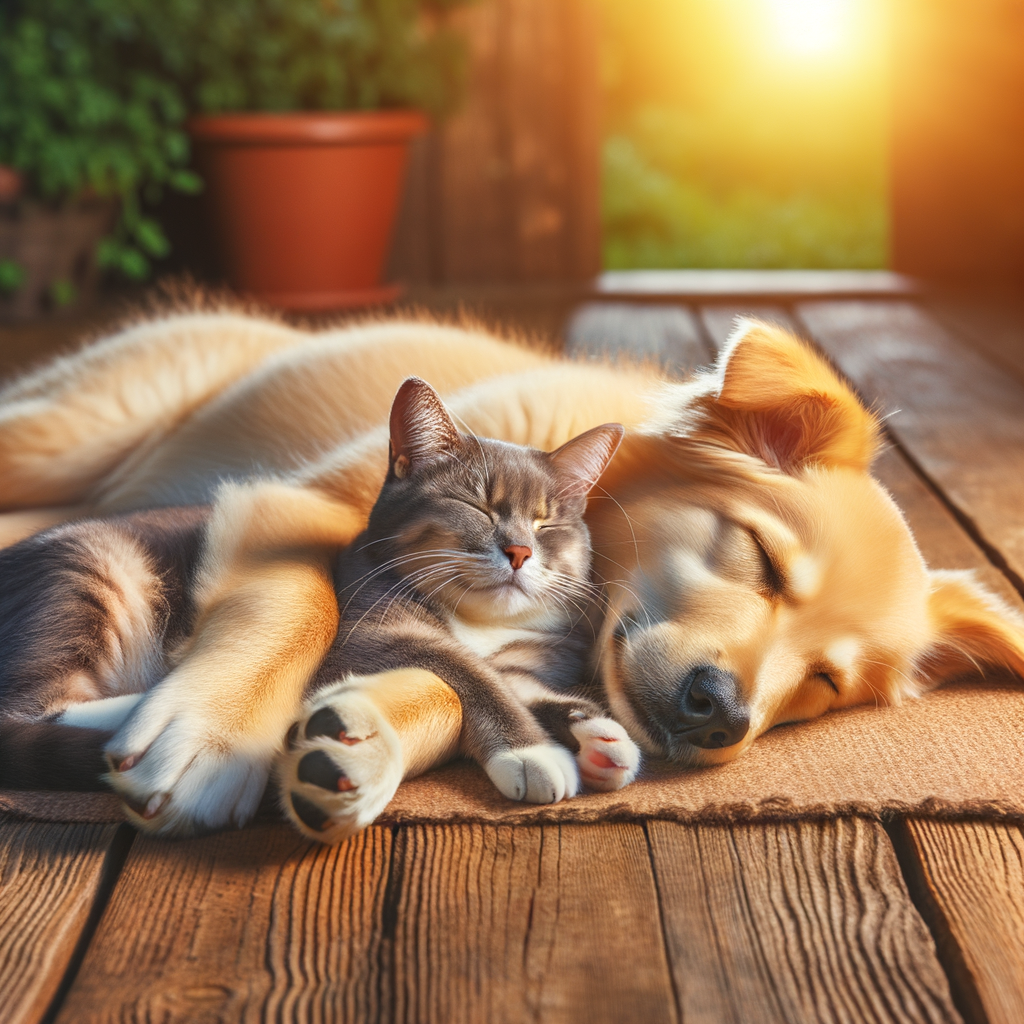

In [11]:
show_image(url_or_local_image_path_or_data)

## 请求生成图片接口，这是一个 b64_json 的例子，直接将图片数据传过来，虽然传输数据量比较大，但不需要二次下载，可以直接保存到本地，因此整体上效率更高，从 cost time = 13.5s 可以看出。

In [12]:
# cost time = 12.0s.
# Display a tender and friendly scene of a cat and a dog interacting.
revised_prompt, url_or_local_image_path_or_data = get_image_create("展示一只猫和一只狗亲密友好的画面。", response_format="b64_json")
print(revised_prompt)

cost time = 15.1s.
Display an affectionate and friendly scene with a cat and a dog interacting closely.


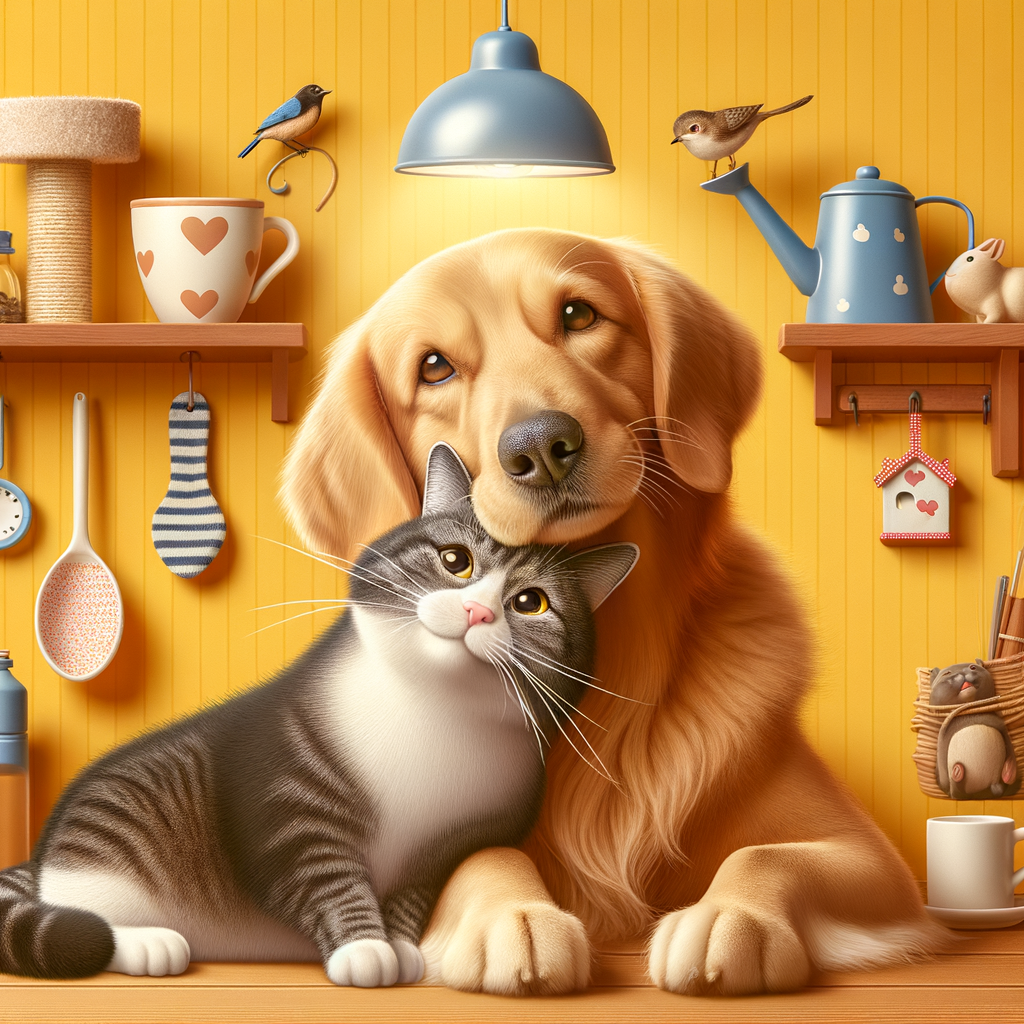

In [13]:
show_image(url_or_local_image_path_or_data)